# Exploratory Data Analysis

In this notebook, we will explore relationships in data through visualization, and attempt to answer the question we asked in the beginning.

In [1]:
from altair import *
import pandas as pd
import numpy as np

Here is the dataframe we made previously, grouping together batting, fielding, pitching, and team performance data for the regular season.

In [5]:
grouped = pd.read_pickle('/home/jnogle/finalproject/dataframes/grouped')
grouped = grouped.drop('ws_win',axis=1)
grouped.head()

,year,team_id,div_id,rank,g,w,name,e,ba,era
0,2000,ANA,W,3,162,82,Anaheim Angels,2.310345,0.271819,5.384400
1,2000,ARI,W,3,162,85,Arizona Diamondbacks,1.945455,0.247616,5.310000
2,2000,ATL,E,1,162,95,Atlanta Braves,2.388889,0.184948,5.575909
3,2000,BAL,E,4,162,74,Baltimore Orioles,1.966102,0.202421,6.768636
4,2000,BOS,E,2,162,85,Boston Red Sox,1.651515,0.207478,5.046667


And here is the dataframe containing the same information for the postseason.

In [7]:
grouped_post = pd.read_pickle('/home/jnogle/finalproject/dataframes/grouped_post')
grouped_post = grouped_post.drop(['rank','g','w','div_id'],axis=1)
grouped_post.head()

,year,team_id,ws_win,name,e,ba,era
0,2000,ATL,N,Atlanta Braves,0.238095,0.175931,7.628889
1,2000,CHA,N,Chicago White Sox,0.086957,0.173783,3.856667
2,2000,NYA,Y,New York Yankees,0.081967,0.267127,3.004583
3,2000,NYN,N,New York Mets,0.123288,0.182100,3.388621
4,2000,OAK,N,Oakland Athletics,0.200000,0.323959,2.360000


The first thing we will do is analyze the performance of an individual team to see what portion of the game had the most significant effect on their performance.

## Data Analysis

### Regular Season

#### Dodgers

In [8]:
dodgers_reg = grouped[grouped.team_id == 'LAN']
dodgers_reg.head()

,year,team_id,div_id,rank,g,w,name,e,ba,era
14,2000,LAN,W,2,162,86,Los Angeles Dodgers,2.014925,0.202481,6.331905
44,2001,LAN,W,3,162,86,Los Angeles Dodgers,1.966102,0.223636,4.805714
74,2002,LAN,W,3,162,92,Los Angeles Dodgers,1.730769,0.225974,4.548947
104,2003,LAN,W,2,162,85,Los Angeles Dodgers,2.087719,0.184795,4.034737
134,2004,LAN,W,1,162,93,Los Angeles Dodgers,1.280702,0.177241,3.646364


Here is a visualization of the Los Angeles Dodgers average ERA per pitcher from 2000-2015. For ERA to show a significant effect on performance, we would expect to see the largest, blue circles closer to the bottom of the chart than the majority of the other circles.

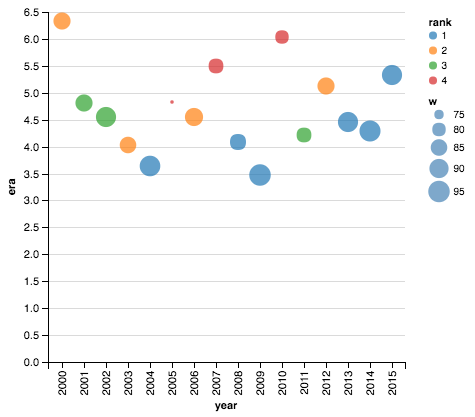

In [9]:
Chart(dodgers_reg).mark_circle().encode(
    X('year:N'),
    Y('era'),
    Size('w'),
    Color('rank:N')
)

It seems that ERA does have somewhat of an effect on team performance judging from this visualization.

Here is a visualization of the Los Angeles Dodger's Batting Average per player from 2000-2015. For Batting Average to show a significant effect on performance, we would expect to see the largest, blue circles closer to the top of the chart than the majority of the other circles.

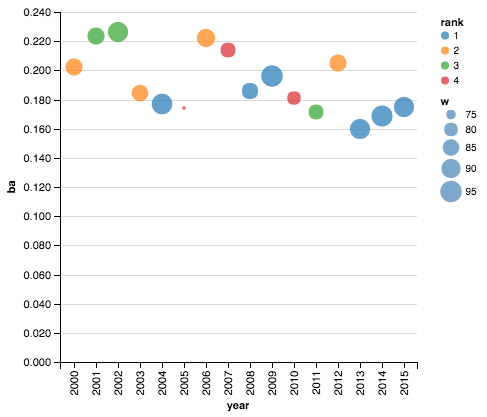

In [10]:
Chart(dodgers_reg).mark_circle().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f')),
    Size('w'),
    Color('rank:N')
)

Unlike ERA, Batting Average does not seem to have a significant effect on performance judging from this visualization.

Here is a visualization of the Los Angeles Dodger's average Errors per player from 2000-2015. For Errors to show a significant effect on performance, we would expect to see the largest, blue circles closer the bottom of the chart than the majority of the other circles.

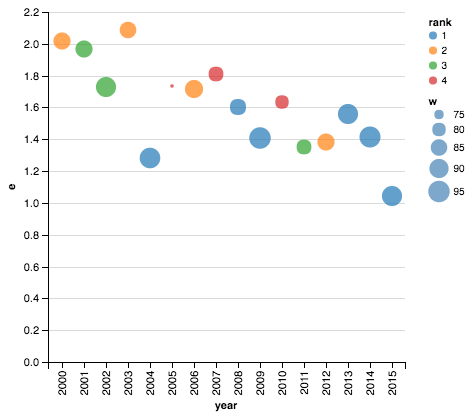

In [11]:
Chart(dodgers_reg).mark_circle().encode(
    X('year:N'),
    Y('e'),
    Size('w'),
    Color('rank:N')
)

It would seem that fielding has the most significant effect on performance, judging from the comparison of this visualization to the other two.

Let's look at another team.

#### Giants

In [12]:
giants_reg = grouped[grouped.name == 'San Francisco Giants']
giants_reg.head()

,year,team_id,div_id,rank,g,w,name,e,ba,era
25,2000,SFN,W,1,162,97,San Francisco Giants,2.066667,0.253003,4.981176
55,2001,SFN,W,2,162,90,San Francisco Giants,2.226415,0.203409,5.067222
85,2002,SFN,W,2,162,95,San Francisco Giants,1.800000,0.257944,3.291176
115,2003,SFN,W,1,161,100,San Francisco Giants,1.481481,0.219046,4.419524
145,2004,SFN,W,2,162,91,San Francisco Giants,1.870370,0.218696,7.280909


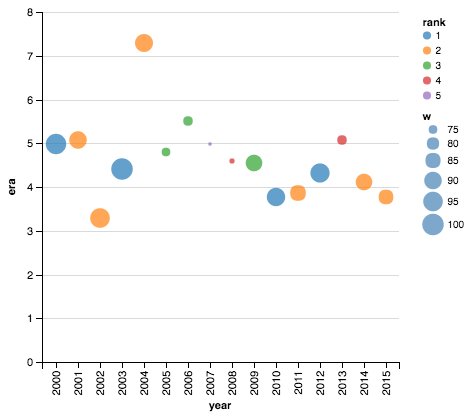

In [13]:
Chart(giants_reg).mark_circle().encode(
    X('year:N'),
    Y('era'),
    Size('w'),
    Color('rank:N')
)

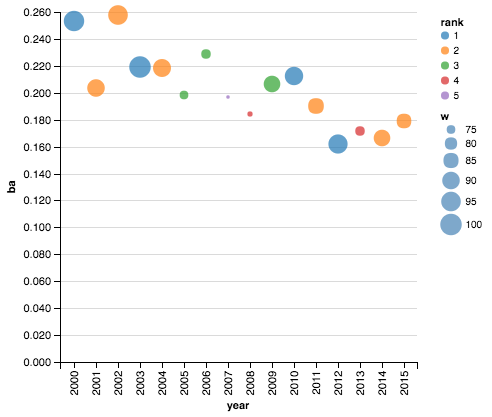

In [14]:
Chart(giants_reg).mark_circle().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f')),
    Size('w'),
    Color('rank:N')
)

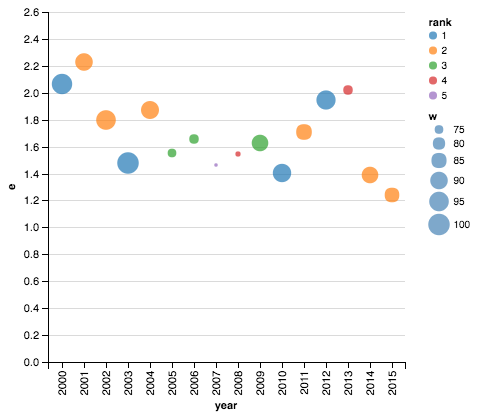

In [15]:
Chart(giants_reg).mark_circle().encode(
    X('year:N'),
    Y('e'),
    Size('w'),
    Color('rank:N')
)

The statistics from the Giants seasons do not support any one of the three components having a significant effect on performance. We'll look at the rest of the teams in this division to see if we can find any trends.

#### Diamondbacks

In [16]:
DB_reg = grouped[grouped.name == 'Arizona Diamondbacks']
DB_reg.head()

,year,team_id,div_id,rank,g,w,name,e,ba,era
1,2000,ARI,W,3,162,85,Arizona Diamondbacks,1.945455,0.247616,5.310000
31,2001,ARI,W,1,162,92,Arizona Diamondbacks,1.527273,0.205594,4.173182
61,2002,ARI,W,1,162,98,Arizona Diamondbacks,1.618182,0.225686,5.437000
91,2003,ARI,W,3,162,84,Arizona Diamondbacks,1.910714,0.230706,4.387727
121,2004,ARI,W,5,162,51,Arizona Diamondbacks,1.985714,0.180531,5.664800


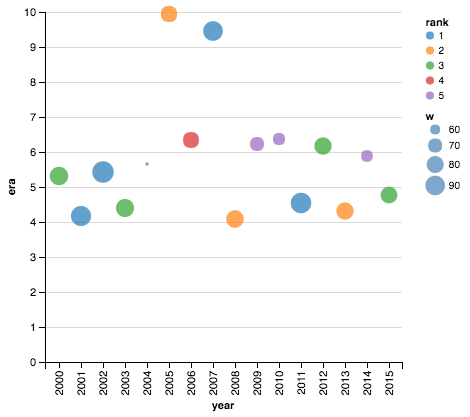

In [17]:
Chart(DB_reg).mark_circle().encode(
    X('year:N'),
    Y('era'),
    Size('w'),
    Color('rank:N')
)

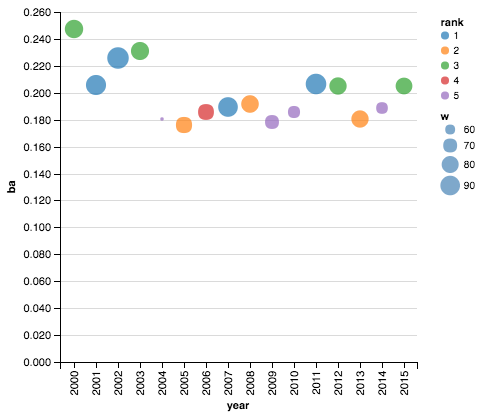

In [18]:
Chart(DB_reg).mark_circle().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f')),
    Size('w'),
    Color('rank:N')
)

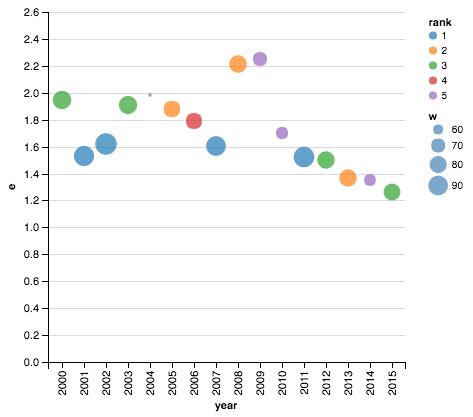

In [19]:
Chart(DB_reg).mark_circle().encode(
    X('year:N'),
    Y('e'),
    Size('w'),
    Color('rank:N')
)

There is no blaring evidence from the Diamondbacks team statistics to support any one of the three components having a significant effect on team performance.

#### Rockies

In [20]:
rockies_reg = grouped[grouped.name == 'Colorado Rockies']
rockies_reg.head()

,year,team_id,div_id,rank,g,w,name,e,ba,era
9,2000,COL,W,4,162,82,Colorado Rockies,1.516129,0.256631,9.492800
39,2001,COL,W,5,162,73,Colorado Rockies,1.523810,0.219047,6.224615
69,2002,COL,W,4,162,73,Colorado Rockies,1.964912,0.225350,5.744091
99,2003,COL,W,4,162,74,Colorado Rockies,1.657143,0.198073,5.273478
129,2004,COL,W,4,162,68,Colorado Rockies,1.483333,0.184432,7.344400


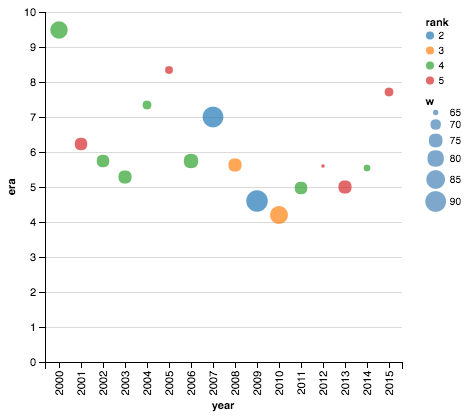

In [21]:
Chart(rockies_reg).mark_circle().encode(
    X('year:N'),
    Y('era'),
    Size('w'),
    Color('rank:N')
)

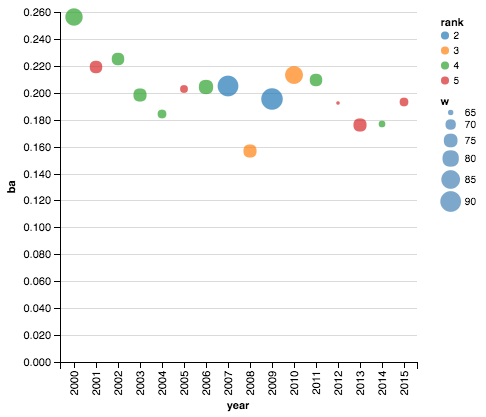

In [22]:
Chart(rockies_reg).mark_circle().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f')),
    Size('w'),
    Color('rank:N')
)

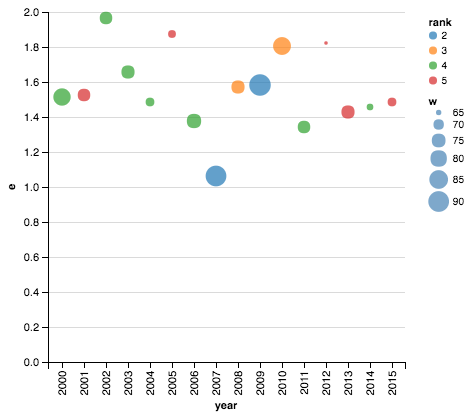

In [23]:
Chart(rockies_reg).mark_circle().encode(
    X('year:N'),
    Y('e'),
    Size('w'),
    Color('rank:N')
)

There is not enough evidence to support any of the three components having a significant effect on team performance based on the Rockies statistics.

#### Padres

In [24]:
padres_reg = grouped[grouped.name == 'San Diego Padres']
padres_reg.head()

,year,team_id,div_id,rank,g,w,name,e,ba,era
23,2000,SDN,W,5,162,76,San Diego Padres,1.784810,0.202798,5.858621
53,2001,SDN,W,4,162,79,San Diego Padres,2.230769,0.162720,5.154400
83,2002,SDN,W,5,162,66,San Diego Padres,1.600000,0.168619,5.773784
113,2003,SDN,W,5,162,64,San Diego Padres,1.545455,0.187991,5.315769
143,2004,SDN,W,3,162,87,San Diego Padres,1.830508,0.178298,7.255833


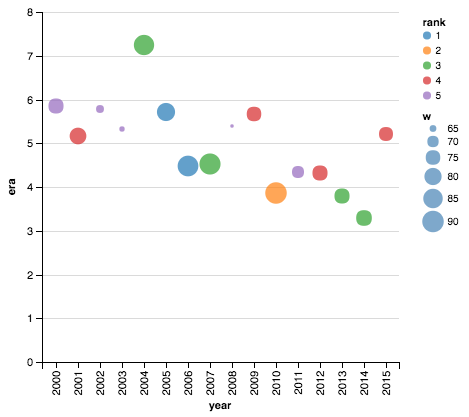

In [25]:
Chart(padres_reg).mark_circle().encode(
    X('year:N'),
    Y('era'),
    Size('w'),
    Color('rank:N')
)

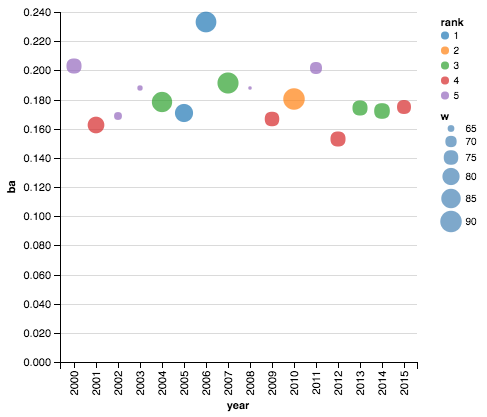

In [26]:
Chart(padres_reg).mark_circle().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f')),
    Size('w'),
    Color('rank:N')
)

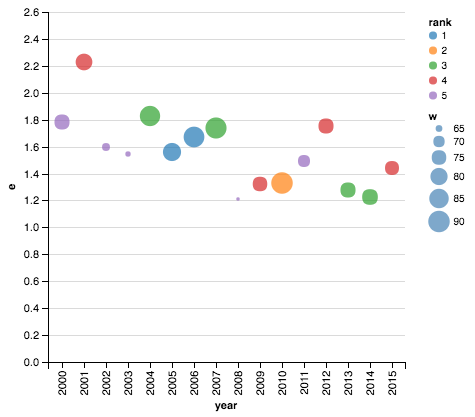

In [27]:
Chart(padres_reg).mark_circle().encode(
    X('year:N'),
    Y('e'),
    Size('w'),
    Color('rank:N')
)

The Padres data does not support any of the three components of the game to have a significant effect on team performance either, so we can come to a reasonable conclusion that for individual teams during the regular season, neither fielding, batting, nor pitching has a significant effect on team performance by itself.

### Postseason

Let's look at postseason statistics to see if we can find any evidence to support any of the three components having a significant effect on postseason performance. "Postseason performance" will be measured by whether or not a team won the World Series in a given year. We'll look at the stats for the two teams who have won the most World Series championships in the last sixteen years: The San Francisco Giants and Boston Red Sox

#### Giants

In [28]:
giants_post = grouped_post[grouped_post.name == 'San Francisco Giants']
giants_post

,year,team_id,ws_win,name,e,ba,era
6,2000,SFN,N,San Francisco Giants,0.040000,0.176686,2.945455
22,2002,SFN,N,San Francisco Giants,0.156250,0.189051,4.557143
31,2003,SFN,N,San Francisco Giants,0.280000,0.215143,3.255000
85,2010,SFN,Y,San Francisco Giants,0.138889,0.211296,3.117143
102,2012,SFN,Y,San Francisco Giants,0.098592,0.191116,7.372941
123,2014,SFN,Y,San Francisco Giants,0.064935,0.248682,3.739429


Here is a chart showing the Giants average ERA in each year they made it to the postseason. To show that average ERA had an effect on their performance, we would expect to see the green points (won the World Series that year) near the bottom of the chart, lower than the red points (did not win the World Series that year).

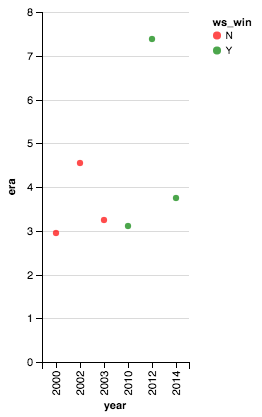

In [29]:
Chart(giants_post).mark_circle().encode(
    X('year:N'),
    Y('era'),
    Color('ws_win:N',scale=Scale(domain=['N', 'Y'], range=['red', 'green']))
)

This chart does not support average ERA having an effect on postseason peformance.

Here is a chart showing the Giants Batting Average in each year they made it to the postseason. To show that Batting Average had an effect on their performance, we would expect to see the green points (won the World Series that year) near the top of the chart, higher than the red points (did not win the World Series that year).

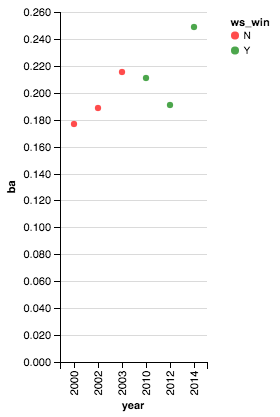

In [30]:
Chart(giants_post).mark_circle().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f')),
    Color('ws_win:N',scale=Scale(domain=['N', 'Y'], range=['red', 'green']))
)

There is not a lot of evidence supporting Batting Average having an effect on performance from this chart.

Here is a chart showing the Giants average number of errors per player in each year they made it to the postseason. To show that average number of errors had an effect on their performance, we would expect to see the green points (won the World Series that year) near the bottom of the chart, lower than the red points (did not win the World Series that year).

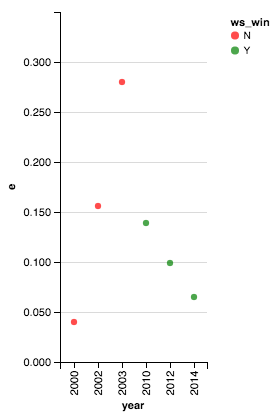

In [31]:
Chart(giants_post).mark_circle().encode(
    X('year:N'),
    Y('e',axis=Axis(format='.3f')),
    Color('ws_win:N',scale=Scale(domain=['N', 'Y'], range=['red', 'green']))
)

There is some evidence supporting average number of errors having an effect on performance from this chart, but not enough to conclude that that is the case.

#### Red Sox

In [32]:
RS_post = grouped_post[grouped_post.name == 'Boston Red Sox']
RS_post

,year,team_id,ws_win,name,e,ba,era
25,2003,BOS,N,Boston Red Sox,0.190476,0.222496,3.310000
34,2004,BOS,Y,Boston Red Sox,0.153846,0.240958,4.528333
41,2005,BOS,N,Boston Red Sox,0.095238,0.230604,10.497143
57,2007,BOS,Y,Boston Red Sox,0.090909,0.297204,3.494444
64,2008,BOS,N,Boston Red Sox,0.021277,0.224828,5.217647
72,2009,BOS,N,Boston Red Sox,0.200000,0.134458,5.625000
107,2013,BOS,Y,Boston Red Sox,0.159420,0.191891,4.850968


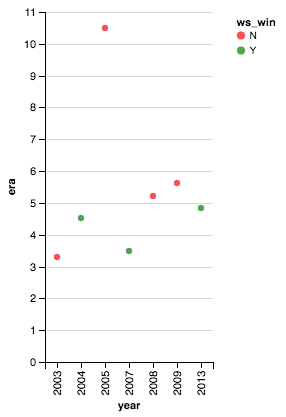

In [33]:
Chart(RS_post).mark_circle().encode(
    X('year:N'),
    Y('era'),
    Color('ws_win:N',scale=Scale(domain=['N', 'Y'], range=['red', 'green']))
)

There is decent evidence here to suggest average ERA had an effect on team performance in the postseason.

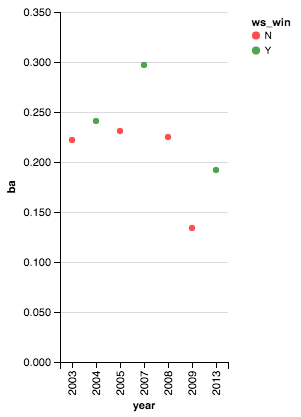

In [34]:
Chart(RS_post).mark_circle().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f')),
    Color('ws_win:N',scale=Scale(domain=['N', 'Y'], range=['red', 'green']))
)

There is some evidence supporting Batting Average having an effect on performance from this chart, but not enough to conclude that that is the case.

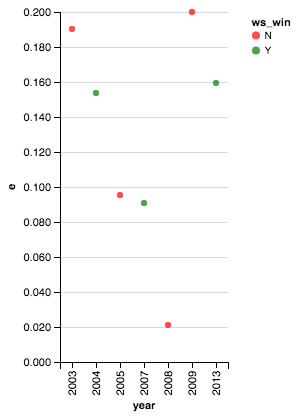

In [35]:
Chart(RS_post).mark_circle().encode(
    X('year:N'),
    Y('e',axis=Axis(format='.3f')),
    Color('ws_win:N',scale=Scale(domain=['N', 'Y'], range=['red', 'green']))
)

There is not a lot of evidence from this chart supporting average number of errors per player having a significant effect on performance.

Being that we found some possible evidence in these charts for individual teams, lets analyze postseason data from a broader perspective. Let's separate the postseason data by those who won the World Series in a given year, and the rest of the teams who didn't. 

In [36]:
winners = grouped_post[grouped_post.ws_win == 'Y']
winners.head()

,year,team_id,ws_win,name,e,ba,era
2,2000,NYA,Y,New York Yankees,0.081967,0.267127,3.004583
8,2001,ARI,Y,Arizona Diamondbacks,0.149254,0.202463,5.511250
16,2002,ANA,Y,Anaheim Angels,0.145161,0.316314,5.655000
27,2003,FLO,Y,Florida Marlins,0.111111,0.233851,5.948966
34,2004,BOS,Y,Boston Red Sox,0.153846,0.240958,4.528333


In [37]:
losers = grouped_post[grouped_post.ws_win == 'N']
losers['era'][134] = None
losers = losers.dropna()
losers.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,team_id,ws_win,name,e,ba,era
0,2000,ATL,N,Atlanta Braves,0.238095,0.175931,7.628889
1,2000,CHA,N,Chicago White Sox,0.086957,0.173783,3.856667
3,2000,NYN,N,New York Mets,0.123288,0.182100,3.388621
4,2000,OAK,N,Oakland Athletics,0.200000,0.323959,2.360000
5,2000,SEA,N,Seattle Mariners,0.081633,0.242254,3.132941


#### Pitching

Below is a chart showing the average ERA for the team that won the World Series in each year from 2000-2015.

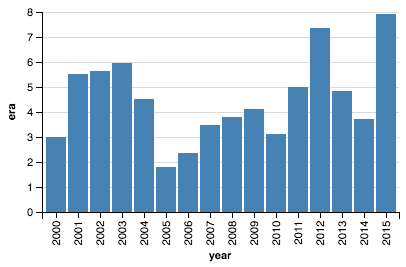

In [38]:
Chart(winners).mark_bar().encode(
    X('year:N'),
    Y('era')
).configure_cell(width = 100, height = 200)

And here is a chart showing the average ERA for all the teams that did not win the World Series in a given year.

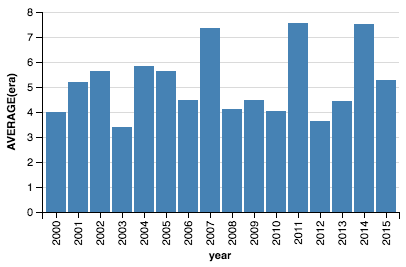

In [39]:
Chart(losers).mark_bar().encode(
    X('year:N'),
    Y('average(era)')
).configure_cell(width = 100, height = 200)

Let's check to see how the winner's ERA compared to the rest of the teams' ERA who made it to the postseason in a given year on average.

In [40]:
avg_losers_era = losers.groupby('year')['era'].mean()

In [41]:
winners_era = winners.groupby('year')['era'].mean()

In [42]:
era_diff = winners_era - avg_losers_era
era_diff

year
2000   -0.975625
2001    0.305962
2002    0.015512
2003    2.549232
2004   -1.311214
2005   -3.846652
2006   -2.126060
2007   -3.879368
2008   -0.325184
2009   -0.367070
2010   -0.917888
2011   -2.564510
2012    3.730506
2013    0.430498
2014   -3.779416
2015    2.645852
Name: era, dtype: float64

In [43]:
era_diff.mean()

-0.65096405061086982

On average, the winners of the World Series had a lower ERA than the rest of the teams in the postseason by 0.65. Although this is what we want to see, it is not very significant.

#### Batting

Below is a chart showing the Batting Average for the team that won the World Series in each year from 2000-2015.

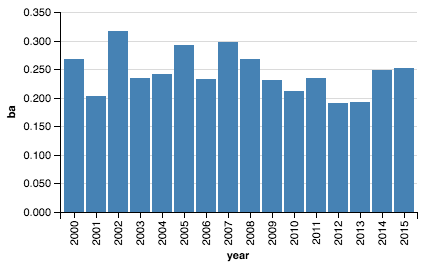

In [44]:
Chart(winners).mark_bar().encode(
    X('year:N'),
    Y('ba',axis=Axis(format='.3f'))
).configure_cell(width = 100, height = 200)

And here is a chart showing the Batting Average for all the teams that did not win the World Series in a given year.

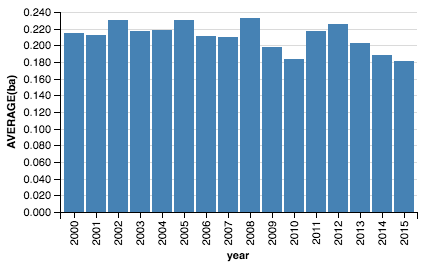

In [45]:
Chart(losers).mark_bar().encode(
    X('year:N'),
    Y('average(ba)',axis=Axis(format='.3f'))
).configure_cell(width = 100, height = 200)

Let's check to see how the winner's Batting Average compared to the rest of the teams' Batting Average who made it to the postseason in a given year.

In [46]:
avg_losers_ba = losers.groupby('year')['ba'].mean()

In [47]:
winners_ba = winners.groupby('year')['ba'].mean()

In [48]:
ba_diff = winners_ba - avg_losers_ba
ba_diff

year
2000    0.051893
2001   -0.010001
2002    0.086002
2003    0.016060
2004    0.023119
2005    0.061093
2006    0.021619
2007    0.087526
2008    0.034510
2009    0.033186
2010    0.028275
2011    0.017319
2012   -0.034495
2013   -0.011208
2014    0.060628
2015    0.071230
Name: ba, dtype: float64

In [49]:
ba_diff.mean()

0.033547226015755299

On average, the winners of the World Series had a higher Batting Average than the rest of the teams in the postseason by 0.03. Although this is what we want to see, it is not very significant.

#### Fielding

Below is a chart showing the average number of fielding errors for the team that won the World Series in each year from 2000-2015.

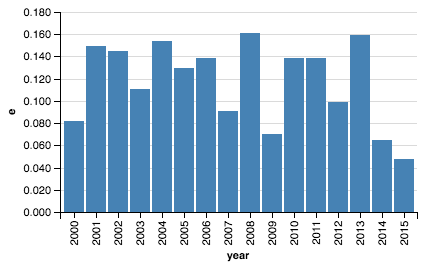

In [50]:
Chart(winners).mark_bar().encode(
    X('year:N'),
    Y('e',axis=Axis(format='.3f'))
).configure_cell(width = 100, height = 200)

And here is a chart showing the average number of fielding errors for all the teams that did not win the World Series in a given year.

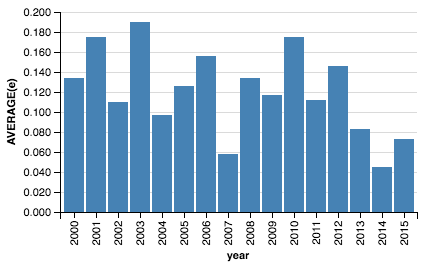

In [51]:
Chart(losers).mark_bar().encode(
    X('year:N'),
    Y('average(e)',axis=Axis(format='.3f'))
).configure_cell(width = 100, height = 200)

Let's check to see how the winner's average number of errors compared to the rest of the teams' average number of errors who made it to the postseason in a given year.

In [52]:
avg_losers_e = losers.groupby('year')['e'].mean()

In [53]:
winners_e = winners.groupby('year')['e'].mean()

In [54]:
e_diff = winners_e - avg_losers_e
e_diff

year
2000   -0.052345
2001   -0.025601
2002    0.034860
2003   -0.079051
2004    0.057142
2005    0.003422
2006   -0.017209
2007    0.033211
2008    0.027438
2009   -0.046734
2010   -0.036443
2011    0.026625
2012   -0.047201
2013    0.076609
2014    0.019965
2015   -0.025268
Name: e, dtype: float64

In [55]:
e_diff.mean()

-0.0031612086217473519

On average, the winners of the World Series had a lower average number of fielding errors than the rest of the teams in the postseason by 0.003. Although this is what we want to see, it is not very significant.

## Conclusion

The goal of our Exploratory Data Analysis was to see if any one core aspect of the game of baseball (fielding, batting, or pitching) had more of a significant effect on team performance than the others. If not, do all three have an effect on performance, or do none of them? To start, we looked at the Los Angeles Dodgers statistics. What we found there was promising for both ERA and Fielding Errors, but as we looked at four more teams we found that none of the three aspects had a significant contribution to team performance. To go further, we looked at Postseason statistics for the Giants and Red Sox. We found potential correlations here for all three aspects of the game, but nothing blaringly obvious. Finally, we compared the winners of the World Series for the last sixteen years to the rest of the teams in the postseason for those years, and found that on average, the winners had a lower ERA, higher Batting Average, and a lower number of fielding errors than the rest of the teams. However, the difference was miniscule in all three cases, leading us to the reasonable conclusion that no single aspect of the game impacts performance more than the others. Therefore, we will use all three of them in our statistical analysis in the next notebook.